# 1. Business Understanding

This data set was made with the intention to predict and prevent studen dropouts and failures in higher education. The data contains basic information about the student and their parents, including socio-economic and demographic information. 

Using this data, we aim to identify factors that may be correlated to an increased probability of a student dropping out and/or failing out of college or university. It would also be useful to identify which factors may indicate a higher probability of student success. If the factors are something in the student's control, these results can be used by employees in higher education to help students who may be at a higher risk of leaving higher education prematurely. The results could also be used by various non-profits and tutoring companies to aid students who are high risk.

Colleges and universities could use this data to increase retention rates. SMU, specifically the Lyle School of Engineering, could utilize this data to make efforts in The Recruitment and Retention Office more effective. 

## Measure of Reliability

https://ieeexplore.ieee.org/document/10056943 

In this article, the researchers sought to predict student performance in higher education. In the literature review section, they referenced multiple other studies that had been done using machine learning. A few of those descriptions included the accuracy of the prediciton models used; in the first, the accuracy was 76.37-82.39%, and on the second, there was an accuracy of 74%. Based on these results, our prediction algorithm should have an accuracy of 75% or greater to be on par with other pre-existing machine learning models.

# 2. Data Understanding

## 2.1 Data Description

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

#remove unwanted columns
drop_columns = ['Previous qualification','Previous qualification (grade)','Admission grade','Daytime/evening attendance\t','Application mode', 'Application order','Tuition fees up to date', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Age at enrollment', 'GDP', 'Inflation rate', 'Unemployment rate']
df = df.drop(drop_columns, axis=1)

#rename target column to 'Dropout'
df = df.rename(columns={'Target': 'Dropout'})

#replace content of 'Dropout' column to 0 and 1 from Graduate and Dropout respectively
df.Dropout.replace(['Graduate', 'Dropout'], [0, 1], inplace=True)
df.head()

,Marital status,Course,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (grade),Dropout
0,1,171,1,19,12,5,9,1,0,0,1,0,0,0,0.000000,0,0.000000,1
1,1,9254,1,1,3,3,3,1,0,0,1,0,0,6,14.000000,6,13.666667,0
2,1,9070,1,37,37,9,9,1,0,0,1,0,0,6,0.000000,6,0.000000,1
3,1,9773,1,38,37,5,3,1,0,0,0,0,0,6,13.428571,6,12.400000,0
4,2,8014,1,37,38,9,9,0,0,0,0,0,0,6,12.333333,6,13.000000,0


In [17]:
#getting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       4424 non-null   int64  
 1   Course                               4424 non-null   int64  
 2   Nacionality                          4424 non-null   int64  
 3   Mother's qualification               4424 non-null   int64  
 4   Father's qualification               4424 non-null   int64  
 5   Mother's occupation                  4424 non-null   int64  
 6   Father's occupation                  4424 non-null   int64  
 7   Displaced                            4424 non-null   int64  
 8   Educational special needs            4424 non-null   int64  
 9   Debtor                               4424 non-null   int64  
 10  Gender                               4424 non-null   int64  
 11  Scholarship holder            

Following table shows description and types of features in the dataset

In [18]:
attr_des = pd.DataFrame();
attr_des['Features'] = df.columns
# Description taken directly from dataset website https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
attr_des['Description'] = ['1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated',
                           '33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)',
                            '1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian',
                            '1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor''s Degree 3 - Higher Education - Degree 4 - Higher Education - Master''s 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can''t read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)',
                            '1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor''s Degree 3 - Higher Education - Degree 4 - Higher Education - Master''s 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can''t read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)',
                            '0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants',
                            '0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers',
                            '1 – yes 0 – no',
                            '1 – yes 0 – no',
                            '1 – yes 0 – no',
                            '1 – male 0 – female',
                            '1 – yes 0 – no',
                            '1 – yes 0 – no',
                            'Number of curricular units enrolled in the 1st semester',
                            'Grade average in the 1st semester (between 0 and 20)',
                            'Number of curricular units enrolled in the 2nd semester',
                            'Grade average in the 2nd semester (between 0 and 20)',
                            '1 - Graduate 2 - Dropout',
                            ]
attr_des['Type'] = ['Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Numeric', 'Numeric', 'Numeric', 'Numeric', 'Nominal']
attr_des['Continous/Discrete'] = ['Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Continous','Continous','Continous','Continous','Discrete']

attr_des

,Features,Description,Type,Continous/Discrete
0,Marital status,1 – single 2 – married 3 – widower 4 – divorce...,Nominal,Discrete
1,Course,33 - Biofuel Production Technologies 171 - Ani...,Nominal,Discrete
2,Nacionality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,Nominal,Discrete
3,Mother's qualification,1 - Secondary Education - 12th Year of Schooli...,Nominal,Discrete
4,Father's qualification,1 - Secondary Education - 12th Year of Schooli...,Nominal,Discrete
5,Mother's occupation,0 - Student 1 - Representatives of the Legisla...,Nominal,Discrete
6,Father's occupation,0 - Student 1 - Representatives of the Legisla...,Nominal,Discrete
7,Displaced,1 – yes 0 – no,Nominal,Discrete
8,Educational special needs,1 – yes 0 – no,Nominal,Discrete
9,Debtor,1 – yes 0 – no,Nominal,Discrete


## 2.2 Data Quality


Before we could perform task on this dataset, we must first ensure the quality of the dataset and fix any inconsistency. The following code is going to check if the dataset contained any missing data.

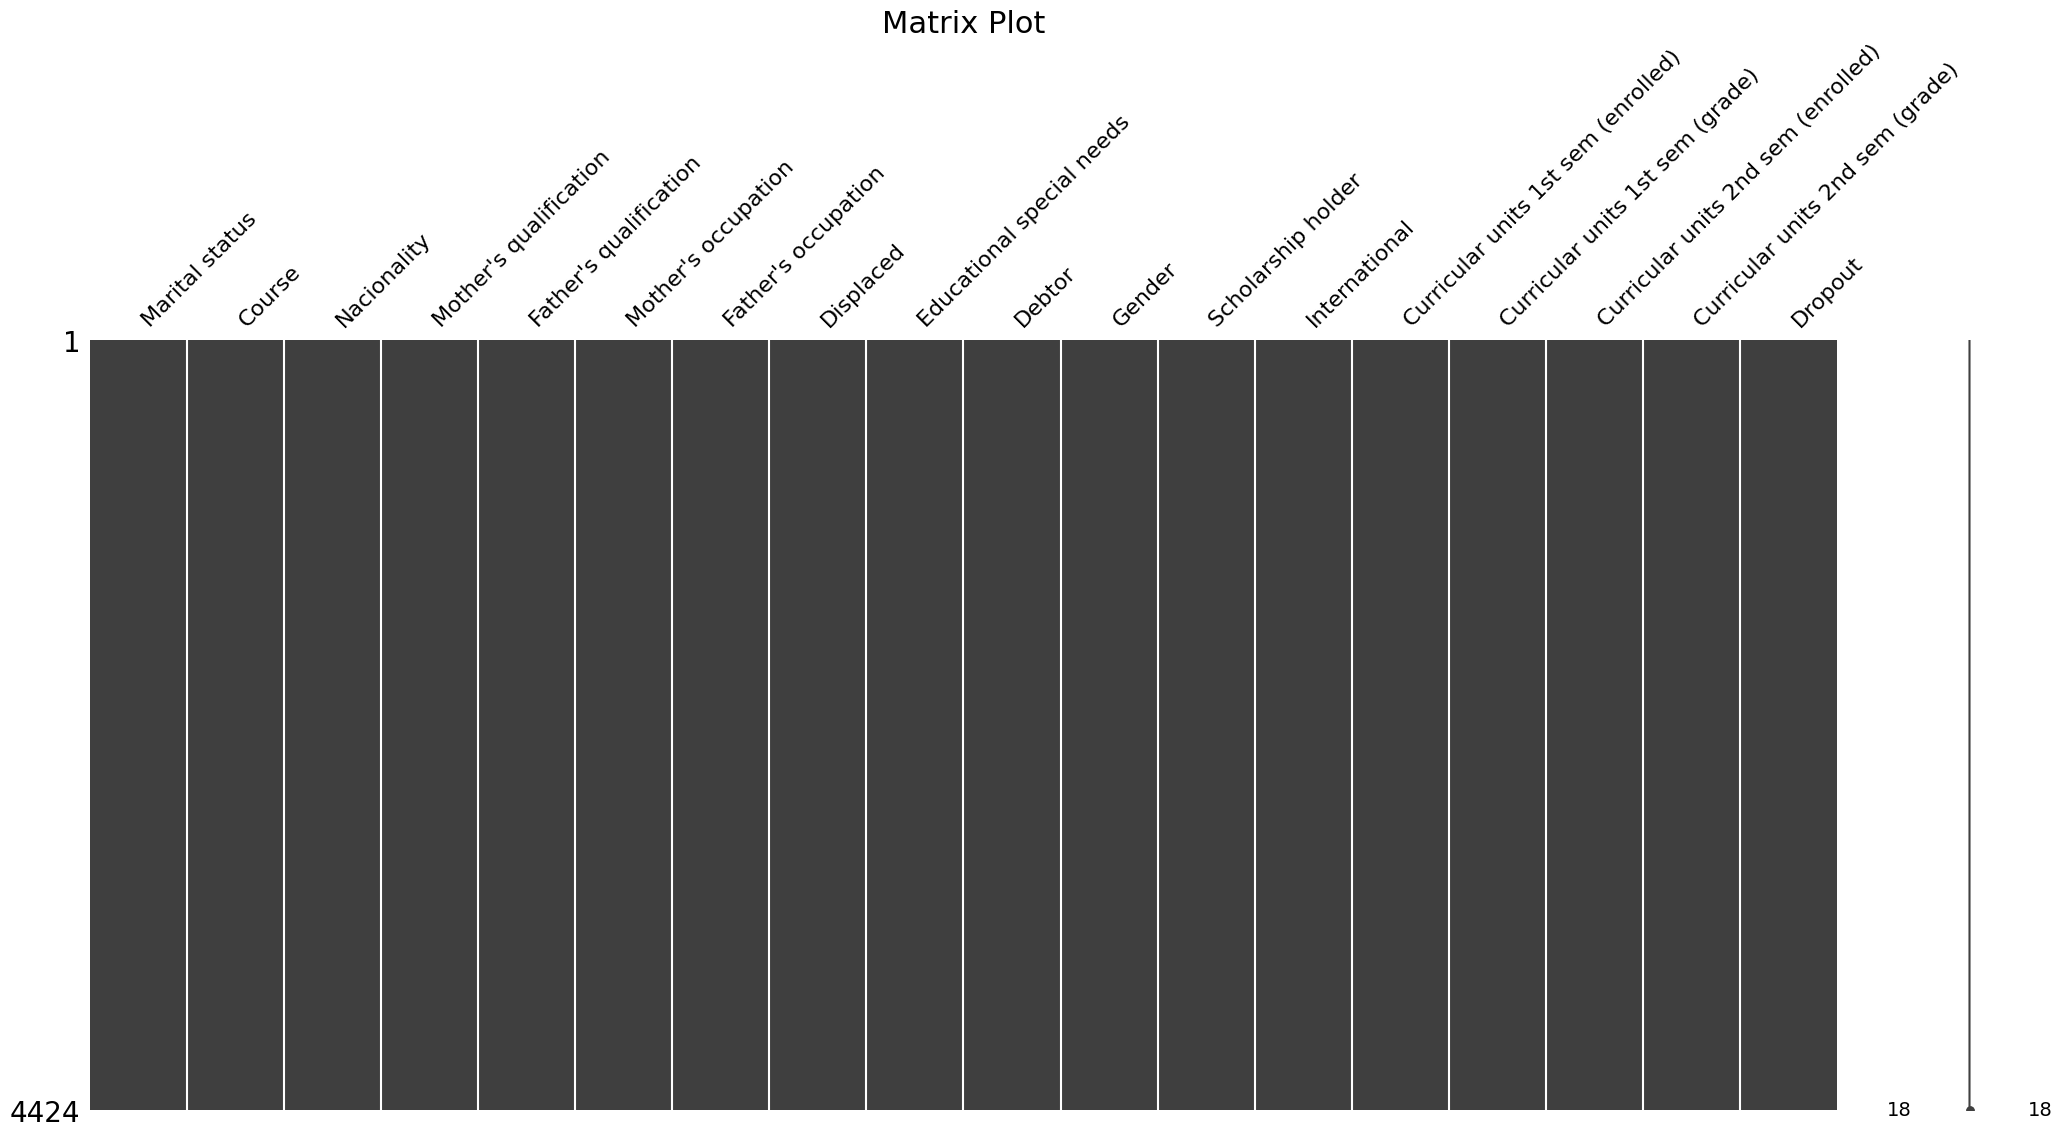

In [19]:
import matplotlib.pylab as plt
import missingno as mn
import pandas as pd
import numpy as np

mn.matrix(df)
plt.title("Matrix Plot", fontsize=22)
plt.show()

In [20]:
# Find the duplicate instances (excluding the first occurrence)
idx = df.duplicated()

# Find the number of duplicate instances
num_duplicates = idx.sum()  # Sum of 'True' values gives the count of duplicates

print(num_duplicates)


15


In [21]:
# Find the rows that are duplicated (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)


      Marital status  Course  Nacionality  Mother's qualification  \
1689               1     171            1                      37   
1814               1    9070            1                       1   
2253               1    9119            1                      34   
2462               1     171            1                       3   
2590               1    9003            1                      19   
3160               1     171            1                      38   
3347               1    9147            1                      37   
3490               1     171            1                      37   
3491               2    9991            1                      37   
3536               1    9991            1                      37   
3682               1    9991            1                      37   
3717               1     171            1                      37   
3839               1     171            1                      37   
4033               1     171      